In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bmi = pd.read_csv(r"C:\Users\Neil\Supervised Machine Learining Lab (SMLL)\BMI.csv")
bmi.head()

,Gender,Height,Weight,Final_Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       500 non-null    object
 1   Height       500 non-null    int64 
 2   Weight       500 non-null    int64 
 3   Final_Index  500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [4]:
bmi.shape

(500, 4)

In [5]:
bmi.isna().sum()

Gender         0
Height         0
Weight         0
Final_Index    0
dtype: int64

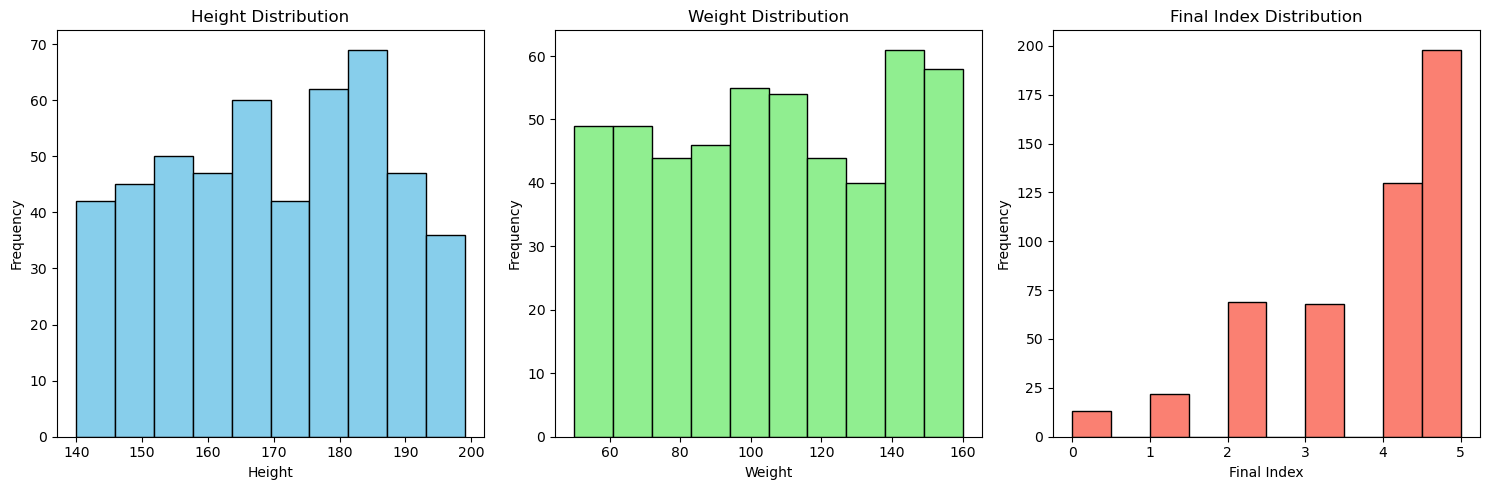

In [6]:
# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for 'Height'
ax[0].hist(bmi['Height'], bins=10, color='skyblue', edgecolor='black')
ax[0].set_title('Height Distribution')
ax[0].set_xlabel('Height')
ax[0].set_ylabel('Frequency')

# Plot histogram for 'Weight'
ax[1].hist(bmi['Weight'], bins=10, color='lightgreen', edgecolor='black')
ax[1].set_title('Weight Distribution')
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('Frequency')

# Plot histogram for 'Final_Index'
ax[2].hist(bmi['Final_Index'], bins=10, color='salmon', edgecolor='black')
ax[2].set_title('Final Index Distribution')
ax[2].set_xlabel('Final Index')
ax[2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [7]:
# Map the Gender column
bmi['Gender'] = bmi['Gender'].map({'Male': 0, 'Female': 1})

# Display the updated DataFrame
print(bmi.head())


   Gender  Height  Weight  Final_Index
0       0     174      96            4
1       0     189      87            2
2       1     185     110            4
3       1     195     104            3
4       0     149      61            3


In [8]:
# Vif dataframe
vif_data = pd.DataFrame()
vif_data['Feature'] = ['Gender','Height','Weight']


In [9]:
vif_data.head()

,Feature
0,Gender
1,Height
2,Weight


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data['VIF'] = [variance_inflation_factor(bmi.values,i) for i in range(3)]

# Display the VIF DataFrame
print(vif_data)

  Feature        VIF
0  Gender   2.031010
1  Height  11.941301
2  Weight  40.024880


In [11]:
bmi['Height_m'] = bmi['Height'] * 0.01

In [12]:
y = bmi['Final_Index']

In [13]:
print(bmi.head())


   Gender  Height  Weight  Final_Index  Height_m
0       0     174      96            4      1.74
1       0     189      87            2      1.89
2       1     185     110            4      1.85
3       1     195     104            3      1.95
4       0     149      61            3      1.49


In [14]:
bmi.drop(columns=['Height'], inplace=True)

In [15]:
bmi.head()

,Gender,Weight,Final_Index,Height_m
0,0,96,4,1.74
1,0,87,2,1.89
2,1,110,4,1.85
3,1,104,3,1.95
4,0,61,3,1.49


In [16]:
bmi.drop(columns=['Final_Index'], inplace=True)

In [17]:
bmi

,Gender,Weight,Height_m
0,0,96,1.74
1,0,87,1.89
2,1,110,1.85
3,1,104,1.95
4,0,61,1.49
...,...,...,...
495,1,153,1.50
496,1,121,1.84
497,1,136,1.41
498,0,95,1.50


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = bmi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# importing the model
mlr = LinearRegression()
# Fitting the model
mlr.fit(X_train,y_train)


LinearRegression()

In [19]:
# PRedicting
y_pred = mlr.predict(X_test)
print(y_pred)

[4.00042305 2.35182455 3.25757795 3.28935721 4.09980251 6.01906252
 4.73630207 5.63107258 3.10299365 5.82847118 3.64836074 4.40777202
 1.89479948 4.43947187 4.69633276 2.80201508 6.05634566 4.90894203
 2.89304327 5.16442014 2.30908967 5.99284168 1.53994432 3.65522254
 3.8913392  5.32453559 5.79265024 6.26204098 4.32076064 2.45683944
 4.1771071  5.44603967 3.98938802 3.64554302 3.31557805 2.12543954
 4.79158873 2.42785303 3.15963582 2.26896154 4.76946412 1.9762797
 3.84575933 3.06291766 4.93795572 3.23553275 3.29209551 3.21346028
 3.47577292 3.44125535 3.92452612 3.75741731 1.86307477 1.73189117
 5.79126745 2.51890849 2.60722324 6.06046675 6.54232986 4.052892
 4.1509384  5.353522   4.34416377 3.91761218 1.48750265 2.31456868
 3.09193134 3.62208777 2.15719153 2.11437723 2.17655056 4.0943235
 2.16540884 3.17891544 5.78709181 4.9089693  5.30241098 3.88993155
 2.56446108 4.93654565 4.42710619 2.96348846 2.43883592 5.44186403
 3.49369702 5.08565335 2.89865384 4.07916497 4.40766774 2.63902737

In [20]:
# Actual vs Predictied value
mlr_diff = pd.DataFrame({ "Actual Value " : y_test, "Predicted value " : y_pred})
print(mlr_diff)

     Actual Value   Predicted value 
361              4          4.000423
73               2          2.351825
374              4          3.257578
155              4          3.289357
104              4          4.099803
..             ...               ...
347              2          2.411232
86               5          4.744626
75               4          4.403547
438              1          1.719446
15               5          4.360837

[100 rows x 2 columns]


In [21]:
# Errors
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Mean Square Error
mean_square_error = mean_squared_error(y_test,y_pred)
print(f"Mean Square Error is : {mean_square_error}")
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error is : {mae}")
# Root Mean Square Error
root_mean_square_error = np.sqrt(mean_square_error)
print(f"Root Mean Square Error is : {root_mean_square_error}")
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R2 score is : {r2*100}")
#intecept
X_intercept = mlr.intercept_
print(f"X intercept is : {X_intercept}")
Y_intercept = mlr.coef_
print(f"Y intercept is : {Y_intercept}")

Mean Square Error is : 0.3393556144069992
Mean Absolute Error is : 0.4684465810376227
Root Mean Square Error is : 0.5825423713404881
R2 score is : 79.62929261018073
X intercept is : 6.225070667746884
Y intercept is : [-0.06485949  0.03451756 -3.59003525]


In [22]:
# Function to scatter plot with regression line
def plot_scatter_with_regression(ax,x_data,y_data,x_label,y_label,title):
    ax.scatter(x_data,y_data,alpha=0.5)

    # Calculate regression line
    slope, intercept = np.polyfit(x_data,y_data,1)
    regression_line = slope*x_data + intercept

    ax.plot(x_data,regression_line, color='red', label='Regression_Line')

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()

In [28]:
bmi.columns

Index(['Gender', 'Weight', 'Height_m'], dtype='object')

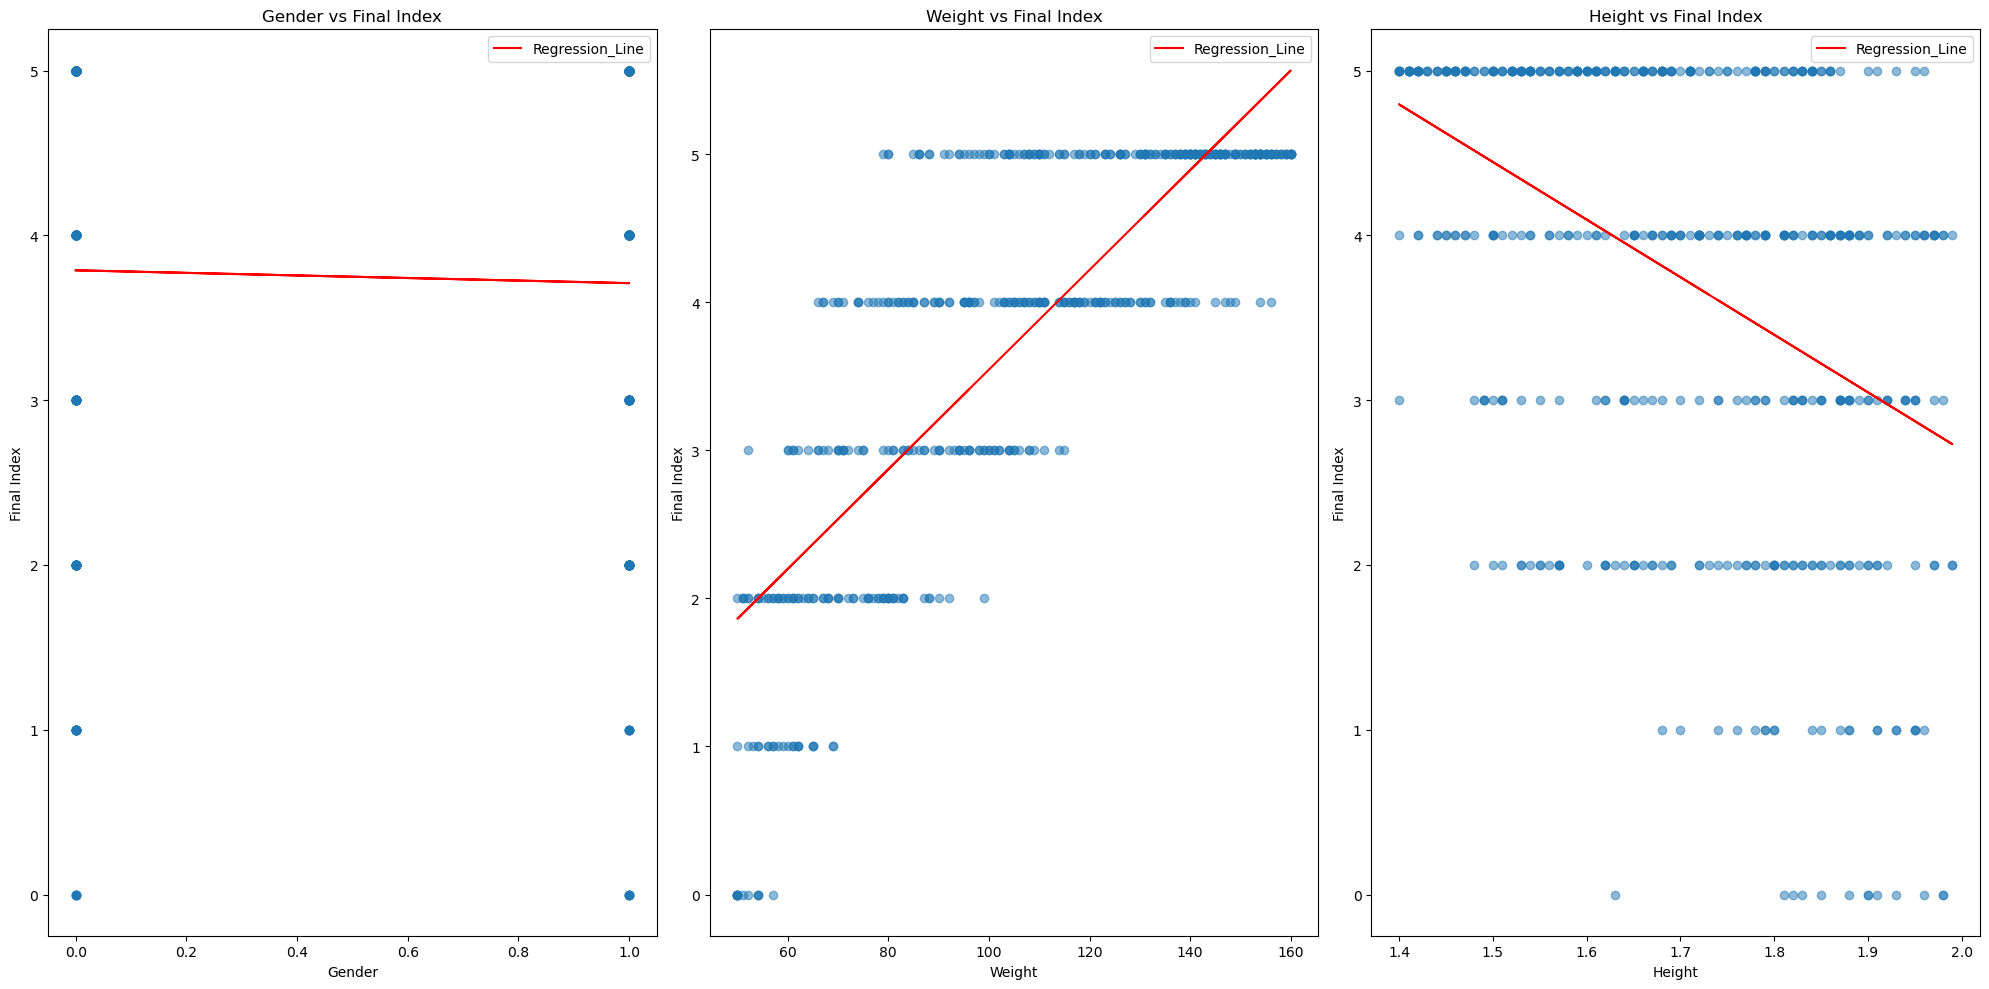

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# Scatter plot for Gender vs Final_Index
plot_scatter_with_regression(ax[0], bmi['Gender'], y, 'Gender', 'Final Index', 'Gender vs Final Index')

# Scatter plot for Weight vs Final_Index
plot_scatter_with_regression(ax[1], bmi['Weight'], y, 'Weight', 'Final Index', 'Weight vs Final Index')

# Scatter plot for Height vs Final_Index
plot_scatter_with_regression(ax[2], bmi['Height_m'], y, 'Height', 'Final Index', 'Height vs Final Index')

plt.tight_layout()
plt.show()
